Download the SDSS quasara data.
- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

(Hint: `scipy.stats` is your best friend)

- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data 

(Hint: `astropy.cosmology` is another close friend). The best-fit cosmological model from the Plack data is:

### Importing the data and plotting it in a histogram

In [4]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

Text(0.5, 0, 'redshift z')

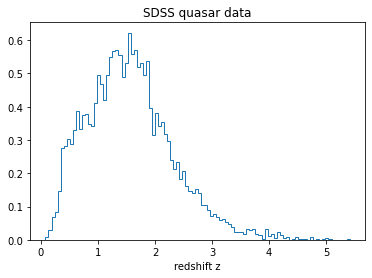

In [5]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
from scipy import stats, interpolate
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

Ndata = 10000

z.sort()

n, bins, patches = plt.hist(z, int(np.sqrt(Ndata)), histtype = 'step', density = True)
plt.title('SDSS quasar data')
plt.xlabel('redshift z')
#each bin value is one edge:
#bins[0] is the left edge of the first bin, bins[1] is the right one. 
#Finally bins[sqrt(Ndata) + 1] is the right edge of the last bin.


### Rejection sampling

Text(0.5, 0, 'redshift z')

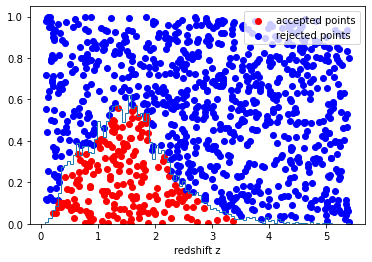

In [14]:
Nsamples = 200

samples = np.empty([2, Nsamples])

#finding in which bin we are
def find_bin(x, bins):
    for i in range(len(bins)):
            if (x >= bins[i] and x < bins[i + 1]):  return i

#generating numbers with a uniform distribution and rejecting all values over the data histogram
i = 0
while (i < Nsamples):
    x = r.uniform(bins[0], bins[len(bins) - 1]) #x in the total bins range
    y = r.uniform(0.0, 1.0) #y between 0 and 1
    in_bin = find_bin (x, bins) #finding the bin which corresponds to the random x value
    if (y < n[in_bin]): #if y under the n of data in the bin -> we save the value
        #print('x in range:', bins[in_bin], '-', bins[in_bin + 1], 'x:', x)
        #print('y must be under:', n[in_bin], 'y:', y, '\n')
        samples[0][i] = x
        samples[1][i] = y
        i+=1
        acc = plt.scatter(x, y, c = 'red')
    else: rej = plt.scatter(x, y, c = 'blue')

plt.hist(z, int(np.sqrt(Ndata)), histtype= 'step', density = True, label='SDSS data')
plt.legend((acc, rej), ('accepted points', 'rejected points'), scatterpoints=1, loc = 'upper right')
plt.xlabel('redshift z')

Text(0.5, 0, 'redshift z')

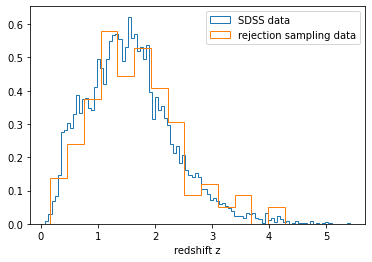

In [7]:
plt.hist(z, int(np.sqrt(Ndata)), histtype= 'step', density = True, label='SDSS data')
plt.hist(samples[0], int(np.sqrt(Nsamples)), histtype= 'step', density = True, label='rejection sampling data')
plt.legend()
plt.xlabel('redshift z')

### Inverse transform sampling

Text(0, 0.5, 'N(x)')

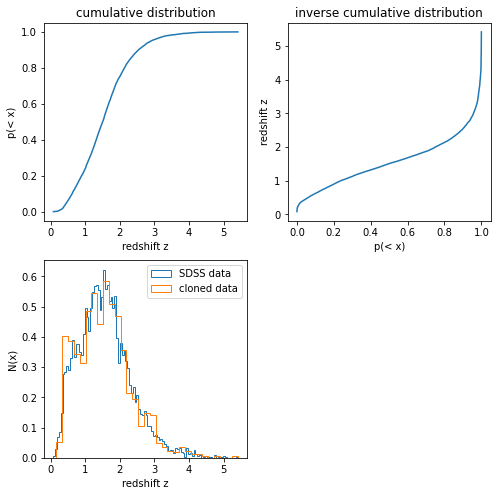

In [47]:
from astroML.density_estimation import EmpiricalDistribution

Nclone = 1000

cumul = np.linspace(0, 1, Ndata)

fig = plt.figure(figsize=(8, 8))

#cumulative distribution plot
ax = fig.add_subplot(221)
ax.plot(z, cumul)
ax.set_title('cumulative distribution')
ax.set_xlabel('redshift z')
ax.set_ylabel('p(< x)')

#inverse cumulative distribution plot
ax = fig.add_subplot(222)
ax.plot(cumul, z)
ax.set_title('inverse cumulative distribution')
ax.set_ylabel('redshift z')
ax.set_xlabel('p(< x)')

z_cloned = EmpiricalDistribution(z).rvs(Nclone)

#inverse cumulative distribution plot
ax = fig.add_subplot(223)
n, bins, patches = ax.hist(z, int(np.sqrt(Ndata)), histtype= 'step', density = True, label='SDSS data')
n, bins, patches = ax.hist(z_cloned, int(np.sqrt(Nclone)), histtype= 'step', density = True, label='cloned data')
ax.legend()
ax.set_xlabel('redshift z')
ax.set_ylabel('N(x)')